# opencv란?

- 컴퓨터 비전 응용 프로그램을 개발할 수 있는 강력한 라이브러리
- BSD 라이선스 하에 배포되므로 학술적 및 상업적 용도로 무료


opencv의 구성  

영상 처리
- 필터링
- 에지검출
- 변환  

특징추출
- 물체 감지
- 트랙킹
- 얼굴 인식

기타
- 기계 학습
- 영상 피라미드
- 스테레오 비전  

mat 클래스 == numpy 라이브러리  

화소의 자료형 지정  
unsigned char는 8비트인데 오버플로우가 일어날 수 있다.  
경우에 따라서 타입을 unsigned 8비트에서 16비트로 바꿀 때가 있다. (16비트는 0~65535)  
실수가 필요할 경우에는 32 비트로 변경함  

객체가 복사될 때  
변수를 새로 할당하여 복사하면  
__얕은 복사__ 가 된다. 이는 주소가 복사된 것으로 실제 데이터가 복사되는 것이 아니다.  
그래서 day1에서 copy 함수를 사용하였었다.  
이것을 __깊은 복사__라고 한다.  



## 전통적인 영상처리  
- 화소 처리
- 공간 필터링  

두가지의 차이는 화소처리는 나만 신경쓰는 것으로 x -> f -> x`  
f(x) = x+10  

공간필터링은 주변 화소값까지 신경쓰는 것임

### 화소 처리
- 밝기 및 콘트라스트 조정  
- 색상 변경
- 

In [166]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, images):
    plt.title(tit)
    if len(images.shape) == 3:
        plt.imshow(cv2.cvtColor(images, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(images, cmap='gray')
    plt.show()

In [35]:
img = cv2.imread('img/Lenna.png',0) # 뒤에 0을 주게되면 gra  y로 변경
print(img.shape)
print(img.dtype) # 데이터의 타입을 나타냄, 리스트와 가장 큰 차이점 numpy는 동일한 형태만 지님

(512, 512)
uint8


여기에 어떤 값을 더해볼 것이다.  
방법은 두가지가 있는데  
비효율적인 방법과  

# point 연산
- y = alpha * img + beta
- clip

In [19]:
dst = img.copy()
for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        dst[r,c] += 50  # 이러면 이미 여기서 넘어가기 때문에 앞에서 체크해주어야한다.
        if dst[r,c] >= 255:
            dst[r,c] = 255
        # 원본 이미지에 30씩 더하는 것

In [44]:
dst = img.copy()
for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        col = img[r,c] + 30
        if col > 255:
            col = 255
        else:
            dst[r,c] = col
            
        # 원본 이미지에 30씩 더하는 것

In [45]:
a = img[0,0] + 100 # 앞은 언사인드 바이트, 뒤는 integer이기 때문에 타입을 변경해서 더하는 것이 가능해진다.
print(a)

269


In [46]:
dst[0,0] = img[0,0] + 100 # 하지만 이렇게는 안된다.

NameError: name 'dset' is not defined

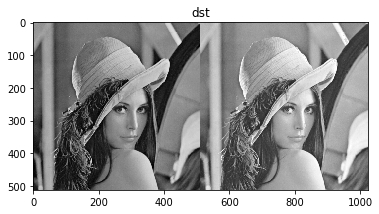

In [49]:
dst =  np.hstack((img, dst))
imshow('dst', dst)


 11111100  
 10001001  
110000101  

앞에 1이 짤리게 되어 음수가 되는데  
양수로 해석하게 되어 작은값으로 변하게 된다.

실제로 구현할 때 python의 numpy의 연산을 사용하지 않고 반복문을 돌리게 되면 너무나도 느리다.  


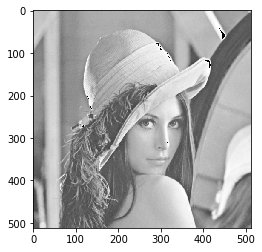

In [36]:
# 실제 사용할 때는 
dst += 20
dst = img + 30
imshow("", dst)

하지만 이렇게 하면 위의 문제처럼 오버플로우가 일어난다.  
이것을 해결하는 방법을 cv2에서 만들어주었다.  

사용하는 함수가 `cv2.add`이다.  

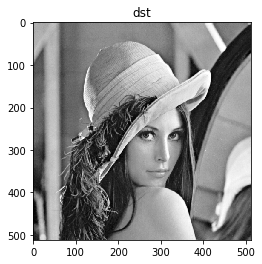

In [43]:
dst = cv2.add(img, 30)
imshow('dst', dst)

__예시__  
astype을 'uint8'을 준 배열에 `cv2.add`를 사용하면  
허용 범위 내에서 연산을 하는 것을 볼 수 있다.  

In [48]:
A = np.array([[1,5], [10,20]]).astype('uint8')
print(A)
print(A.dtype)

B = cv2.add(A, 240)
print(B)

[[ 1  5]
 [10 20]]
uint8
[[241 245]
 [250 255]]


위에는 확장연산으로 연산이 된다.  
아래는 단일연산 * 단일연산이 아니기 때문에 기본 원칙인 type이 변하지 않는다는 것 때문에 오버플로우가 일어난다.  

A와 b는 동일한 타입이 되어야함
그래서 A와 250을 더한 것을 uint8 타입으로 변경하게됨  

uint일 때는 원래 타입을 따라가는 반면  
float일 때는 float형태로 변환된다.  (왜??)  
정수와 실수를 더할 때 정수에 넣을 수 없으니 형변환을 해버린다.  

d는 255보다 큰 값이기 때문에 8비트 다음 단계인 16비트로 넘어간다.

In [54]:
# A array와 숫자 연산이 가능한 이유는 브로드캐스팅이 되기 때문

print(A[1,1] + 250) # 자동 형변환 uint8 -> int32
b = A + 250         # 자동 형변환이 되지만 b가 uint8 타입
c = A + 250.0       # 자동 형변환이 되고 c가 float 타입
d = A + 300         # 자동 형변환이 되고 d가 uint16 타입

print(b) 
print(A.dtype)
print(b.dtype)
print(c.dtype)
print(d.dtype)


270
[[251 255]
 [  4  14]]
uint8
uint8
float64
uint16


영상을 할 때는 항상 _오버플로우_ 에 대해서 고민해야한다.

파이썬 기반의 opencv는 numpy의 좋은 기능들로 인해 대체할수 있는 게 많다.  

`np.clip`함수는  
0보다 작을 경우에는 0으로 대체  
255보다 클 경우에는 255로 대체해주는 것으로써  
더 범용적이다.

In [63]:
dd = np.clip(A+240.0, 0, 255) # 255가 넘어가는 경우에 255로 대체해준다.
print(dd)
print(dd.dtype)

[[241. 245.]
 [250. 255.]]
float64


In [64]:
dd = dd.astype('uint8')
print(dd.dtype)

uint8


또 더해지는 수의 타입을 uint8로 넣어주면 아래와 같은 결과가 발생한다.

In [65]:
dd = np.clip(A+240, 0, 255) # 255가 넘어가는 경우에 255로 대체해준다.
print(dd)
print(dd.dtype)

[[241 245]
 [250   4]]
uint8


따라서 오류를 발생시키지 않기 위해서는 거의 실수를 쓴다.

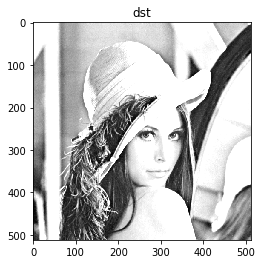

In [68]:
img = cv2.imread('img/Lenna.png', 0)
dst = (np.clip(img + 100.0, 0, 255)).astype('uint8')
imshow('dst', dst)

밝게 하면 할 수록 포화상태가 된다.  
많은 값들이 255로 몰리는 현상  

## 밝기 및 콘트라스트 조정


In [69]:
alpha = 1.1
beta = 20
dst = alpha * img + beta
# 이러면 범위를 넘어갈 수 있으니 clip 사용해야함



직선의 방정식에서 y절편의 의미는 전체적으로 이 데이터들을 들었다 놨다하는 것임  
그래서 y절편을 더한다는 것은 전체적으로 밝게 만드는 것이고 빼면 어둡게  

기울기는 1보다 크면 기울기가 가파라지는 것임  
그럼 전체적으로 영상이 밝아질 것이고 1보다 작으면 전체적으로 어두워짐  

차이점은 기울기 만큼의 변화량이 생기는 것임.  
작은것들은 덜 반영하고 큰것들은 더 많이 반영하게 됨  

개념적으로는 영상을 10% 더 밝게하라 -> 기울기 1.1 곱 이 가능해지는 것


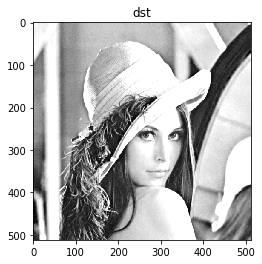

In [70]:
# 50% 밝기 올리기
alpha = 1.5
beta = 0
dst = (np.clip(alpha * img + beta, 0, 255)).astype('uint8')

imshow('dst', dst)

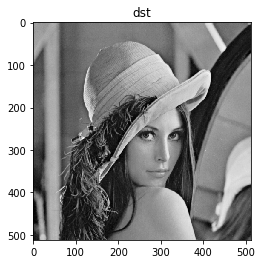

In [71]:
# 10% 밝기 줄이기
alpha = 0.9
beta = 0
dst = (np.clip(alpha * img + beta, 0, 255)).astype('uint8')

imshow('dst', dst)

선형적으로 차이가 벌어진다.  
  
  
어두운 사진으로 한번 보자

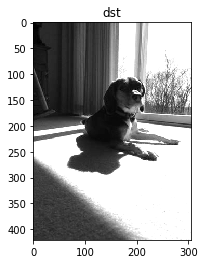

In [73]:
img = cv2.imread('img/gamma2.jpg', 1)
alpha = 1.5
beta = 0
dst = (np.clip(alpha * img + beta, 0, 255)).astype('uint8')

imshow('dst', dst)

포화가 되어서 하늘이 하나도 안보임

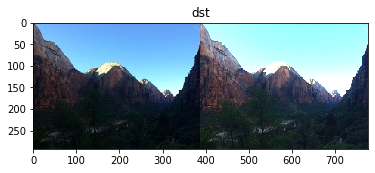

In [79]:
img = cv2.imread('img/gamma3.jpg', 1)
alpha = 1.5
beta = 10
dst = (np.clip(alpha * img + beta, 0, 255)).astype('uint8')

imshow('dst', np.hstack((img, dst)))

이것을 칼라영상에 적용했을 때 문제가 색상이 변해버린다.  

칼라영상에서는 어떻게 하냐면 HSV 스페이스로 변화하여 V에 대해서만 밝기변화를 올려준 후에  

다시 RGB로 변경해준다.  

밝기 변화를 해주어도 별로 차이가 없다고 보이는 이유는  

사람은 어두운 것도 밝게 만들어버리면 별 차이를 느끼지 못함.  



제곱그래프는 직선그래프보다 작은것은 작게 큰것은 크게 증가시킬 수 있음  

비선형 분포를 통해서 다양한 형태의 밝기 변화를 줄 수 있다.  

결국 함수를 만드는 것이 아닌 특정 값이 특정값과 매핑되는 규칙을 (256개의) 테이블 값만 있으면 된다.  

## 반전
 
반전을 위해서는 255 - f(x) 하면 되지만  

우리가 매핑 테이블을 만들어서 규칙에 따라서 할 수 있다.  



# LUT
- 비선형 변환
- 고속 변환

### LUT 사용방법

비선형 방식은 LUT 방법을 통해서 매핑테이블을 만들어서 적용한다. 

가장 대표적인 감마 보정으로  

감마값을 어떻게 설정하느냐에 따라서 기울기가 달라진다.  

r이 1일때는 원래 값이 나오지만 r이 커질수록 어두워지고 r이 1보다 작아지면 밝아진다.  

이것이 곡선형태이기 떄문에 기하급수적으로 느는것을 볼 수 있다.  

감마보정은 대비효과를 크게 보여준다.  그래서 결과가 많이 개선된다.

In [83]:
table = np.array([255-i for i in range(256)])
print(table)

[255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239 238
 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221 220
 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203 202
 201 200 199 198 197 196 195 194 193 192 191 190 189 188 187 186 185 184
 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168 167 166
 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150 149 148
 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132 131 130
 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113 112
 111 110 109 108 107 106 105 104 103 102 101 100  99  98  97  96  95  94
  93  92  91  90  89  88  87  86  85  84  83  82  81  80  79  78  77  76
  75  74  73  72  71  70  69  68  67  66  65  64  63  62  61  60  59  58
  57  56  55  54  53  52  51  50  49  48  47  46  45  44  43  42  41  40
  39  38  37  36  35  34  33  32  31  30  29  28  27  26  25  24  23  22
  21  20  19  18  17  16  15  14  13  12  11  10   

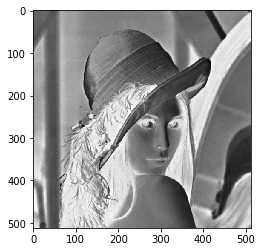

In [84]:
img1 = cv2.imread('img/Lenna.png', 0)
out = cv2.LUT(img1, table)
imshow('',out)

LUT의 원리

In [86]:
dst = img1.copy()
for r in range(img1.shape[0]):
    for c in range(img1.shape[1]):
        dst[r,c] = table[img1[r,c]] # 0 -> 255

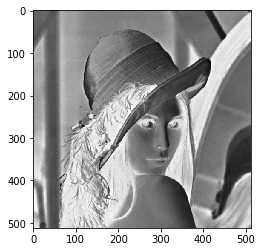

In [87]:
imshow('', dst)

양자화를 어떻게 할까?

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

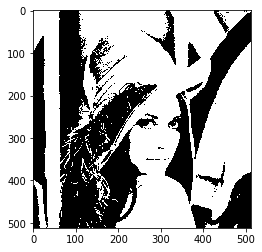

In [99]:
table = np.array([i>127 for i in range(256)]) * 255
print(table)

table = np.array([255 if i>127 else 0 for i in range(256)])
print(table)

out = cv2.LUT(img1, table)
imshow('', out)

LUT를 사용해서 day1에 했던 크로마키를 추출하는 것을 하면 고속으로 연산할 수 있다.  

LUT는 선형도 포함  

LUT를 사용하면 클램핑을 사용하지 않고도 고속으로 연산 가능(밝기 변경 가능)  



gamma 콜렉션을 사용하면 선명해진다.  

쉽게 생각하면 원래 값을 ^r 해준다고 생각하면 된다.  

그럼 어떻게 될까?  
엄청 밝아질 것이다.  

그래서 픽셀값을 0~255값이 아닌 0~1사이로 정해놓고 적용을 해준다.  

감마보정을 이해해보자.



In [102]:
p = 0.5
gamma = 1 # 1이면 원본영상 출력
print(p ** gamma) # 0.5 -> 0.5

0.5


감마가 매우 작아지면 거의 1이 됨

In [103]:
p = 0.5
gamma = 0 # 1이면 원본영상 출력
print(p ** gamma) # 0.5 -> 0.5

1.0


감마가 1보다 작다면 원본보다 밝아짐

In [105]:
p = 0.7
gamma = 0.9
print(p ** gamma) 

0.7254178469372199


원래 값은 1보다 작다.  

감마값이 1보다 작으면 영상이 밝아진다.  

감마값이 1이면 그대로 출력한다.  

감마값이 1보다 크면 영상이 어두워진다.  

이것이 선형적으로 밝아지고 어두워지는 것이 아닌 지수승으로 대비가 바뀌는 것이다.  


In [106]:
p = 0.7
gamma = 0.5
print(p ** gamma)  # 루트

0.8366600265340756


\begin{theorem}\label{theo:}

g(x, y) = (f(x,y) )

\end{theorem}


감마 r에 대한 LUT 테이블을 만들면 쉽게 연산할 수 있다.

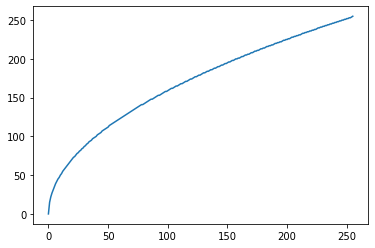

In [115]:
gamma = 0.5
table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype('uint8') # 255.0으로 나누는 것 잘 확인!
#print(table)
plt.plot(table)

확실하게 결과가 좋아지는 것을 볼 수 있다.

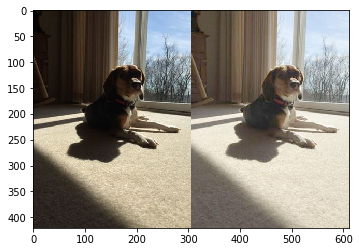

In [117]:
img1 = cv2.imread('img/gamma2.jpg')
out = cv2.LUT(img1, table)
imshow("", np.hstack((img1,out)))

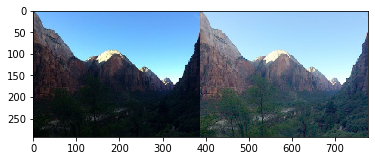

In [119]:
img1 = cv2.imread('img/gamma3.jpg')
out = cv2.LUT(img1, table)
imshow("", np.hstack((img1,out)))

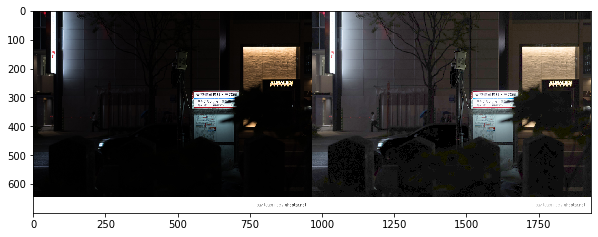

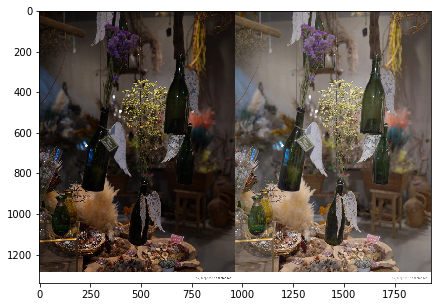

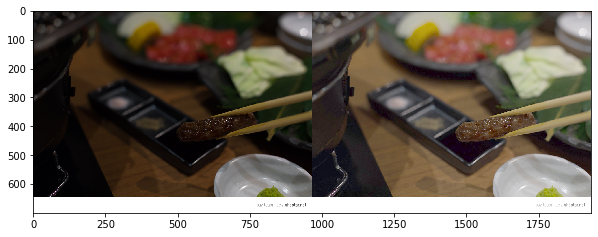

In [176]:
gamma = 0.5
table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype('uint8') 

files = ['img/dark1.jpg', 'img/dark2.jpg', 'img/dark3.jpg']
for f in files:
    img1 = cv2.imread(f)
    out = cv2.LUT(img1, table)
    imshow("", np.hstack((img1,out)))

## 영상 합성

로고 삽입을 해보자

### 선형 영상 합성

g(x, y)  = alpha * f_1(x,y) + (1-alpha)*f_2(x,y)  

가장 간단하게 두 영상을 합성하는 것  

`cv2.addWeighted(img1, 0.8, img2, 0.2, 0.0)`


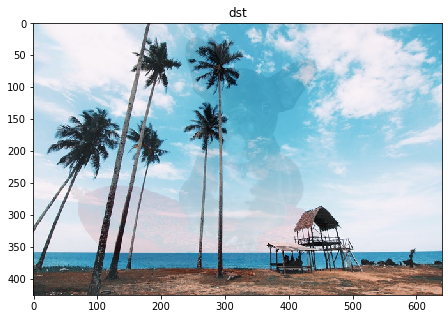

In [175]:
img1 = cv2.imread('img/test1.jpg')
img2 = cv2.imread('img/test2.jpg')

# 선형 영상 합성
alpha = 0.9
dst = cv2.addWeighted(img1, alpha, img2, 1-alpha, 0.0)


imshow('dst', dst)

### 논리적인 영상 합성

- 2개의 영상을 가지고 비트별로 AND, OR, XOR와 같은 논리적인 연산을 적용할 수 있음  

마스크 연산을 할 떄 가장 많이 사용  



In [142]:
img1 = cv2.imread('img/test1.jpg')
img2 = cv2.imread('img/st.png')
print(img1.shape[0], img1.shape[1])

426 640


426 640


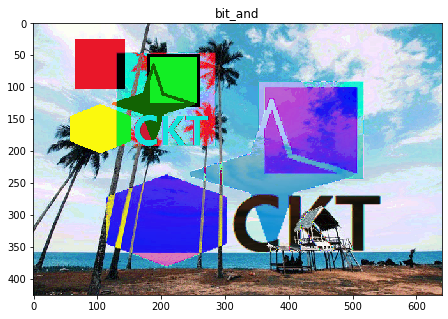

In [174]:
img2 = cv2.resize(img2, dsize=(img1.shape[1], img1.shape[0])) # 폭, 넓이
print(img2.shape[0], img2.shape[1])
bit_and = cv2.bitwise_xor(img1, img2)

imshow('bit_and', bit_and)

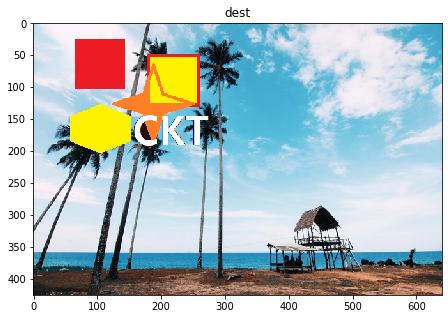

In [173]:
img1 = cv2.imread('img/test1.jpg')
img2 = cv2.imread('img/Logo2.png')
#img2 = cv2.resize(img2, dsize=(img1.shape[1], img1.shape[0])) # 폭, 넓이

for r in range(img2.shape[0]):
    for c in range(img2.shape[1]):
        if np.mean(img2[r,c,:]) > 20:
            img1[r+0, c+0  ,:] = img2[r,c ,:]
        
imshow('dest', img1)

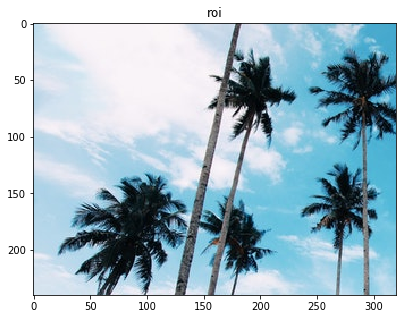

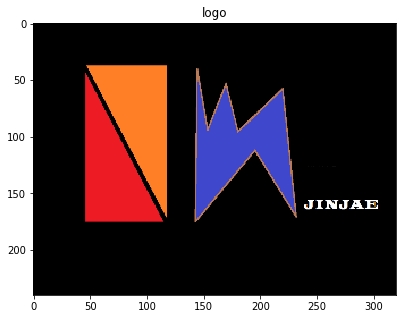

In [169]:
img1 = cv2.imread('img/test1.jpg')
img2 = cv2.imread('img/Logo.png')
img2 = cv2.resize(img2, dsize=(320, 240)) # 폭, 넓이

rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

imshow('roi', roi)
imshow('logo', img2)

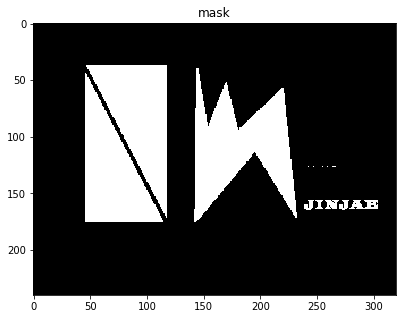

In [167]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
imshow('mask', mask)

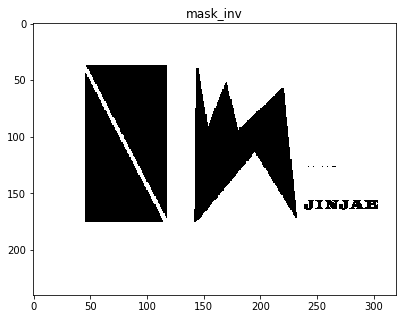

In [168]:
mask_inv = cv2.bitwise_not(mask)
imshow('mask_inv',mask_inv)

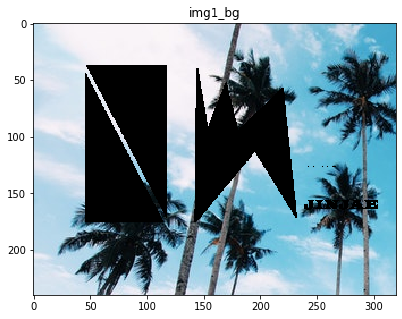

In [170]:
# roi 배경
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
imshow('img1_bg',img1_bg)

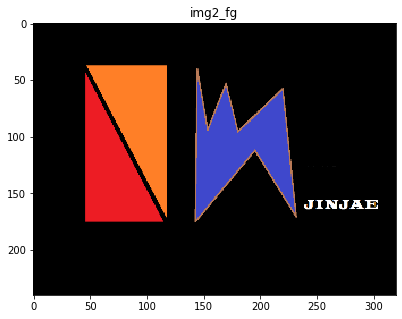

In [171]:
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
imshow('img2_fg',img2_fg)

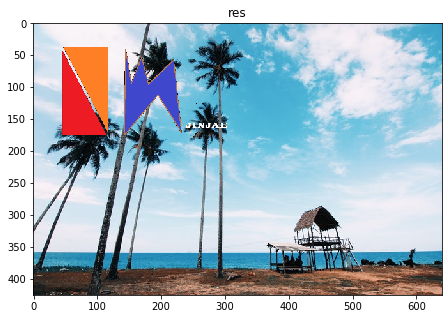

In [172]:
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
imshow('res',img1)

ngrok http 8000

# 히스토그램

- 특정한 값을 가진 화소가 영상 안에 몇 개나 있는지를 막대그래프로 표시한 것  

히스토그램도 채널별로 본다.  

## 히스토그램을 ㅗ알 수 있는 것

- 화소값들의 분포를 한눈에 볼 수 있다.  
    -> 밝은지 어두운지를 어떻게 알 수 있을까? 히스토그램이 한쪽으로 치우쳐짐 

영상 사이즈에 관계없이 256

Open CV에는 히스토그램을 그리는 함수가 있다.  
numpy와 matplotlib 도 있다.  

레나영상에서 밝기만 추출하여 히스토그램을 그려보자


2차원인 이미지를 1차원으로 펴주어야한다. `flatten()`을 사용하자

(array([19330., 29165., 17041., 33724., 37905., 57011., 35141., 17902.,
        14470.,   455.]),
 array([ 39. ,  59.6,  80.2, 100.8, 121.4, 142. , 162.6, 183.2, 203.8,
        224.4, 245. ]),
 <a list of 10 Patch objects>)

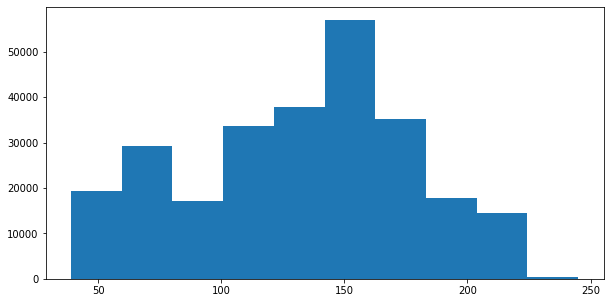

In [177]:
img = cv2.imread('img/Lenna.png', 0) # gray로 읽어오기

# matplotlib에서 지원하는 히스토그램
plt.hist(img.flatten())

open cv의 함수는 `cv2.calcHist()`

(256, 1)


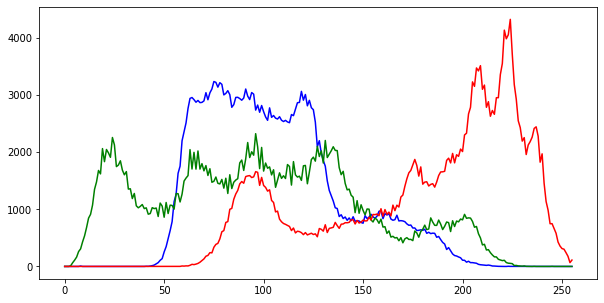

In [183]:
img = cv2.imread('img/Lenna.png') # gray로 읽어오기

hist_b = cv2.calcHist([img], [0], None, [256], [0, 256]) # 이미지, 0번 b채널 , mask=None, 256개로 분할, 범위는 0~256
hist_g = cv2.calcHist([img], [1], None, [256], [0, 256]) # 이미지, 1번 g채널 , mask=None, 256개로 분할, 범위는 0~256
hist_r = cv2.calcHist([img], [2], None, [256], [0, 256]) # 이미지, 2번 r채널 , mask=None, 256개로 분할, 범위는 0~256
print(hist_b.shape)
# print(hist_b)

plt.plot(hist_b, 'b')
plt.plot(hist_g, 'g')
plt.plot(hist_r, 'r')

plt.show()

gamma 콜렉션을 한 전후의 밝기의 histogram 그래프를 시각화해보자.

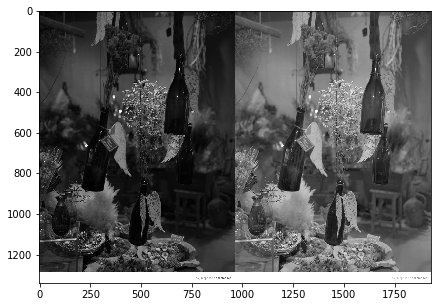

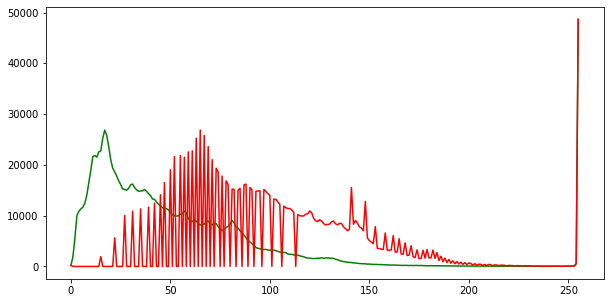

In [189]:
gamma = 0.5
table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype('uint8') 

files = 'img/dark2.jpg'
img1 = cv2.imread(files, 0)
out = cv2.LUT(img1, table)
imshow("", np.hstack((img1,out)))

hist_1 = cv2.calcHist([img1], [0], None, [256], [0, 256]) # 이미지, 0번 b채널 , mask=None, 256개로 분할, 범위는 0~256
hist_2 = cv2.calcHist([out], [0], None, [256], [0, 256]) # 이미지, 0번 b채널 , mask=None, 256개로 분할, 범위는 0~256

plt.plot(hist_1, 'g')
plt.plot(hist_2, 'r')
plt.show()


봉우리가 오른쪽으로, 분포도 더 넓어진 것을 볼 수 있다.  

변환된 후에는 어두운 곳과 밝은 곳의 픽셀 차이가 확실히 더커져 대비 효과가 난 것을 확인.  



## 히스토그램 스트레칭  

히스토그램을 늘리는 것.  

전체적으로 어두운 것과 밝은 것의 편차를 넓히거나 줄여 영상을 대비효과를 줄 수 있다.  



### 화소처리 기법 사용

화소 변화 공식  

10에서 50까지 분포한 그림을  
0 에서 255로 늘릴려고 하려면

(x-10) /(50-10) * 255

In [195]:
src = cv2.imread('img/Lenna.png', 0)

gmin = float(np.min(src))
gmax = float(np.max(src))

print(gmin, gmax)

39.0 245.0


In [196]:
dst = ((src - gmin) * 255. / (gmax - gmin)).astype(np.uint8)
gmin = float(np.min(dst))
gmax = float(np.max(dst))

print(gmin, gmax)

0.0 255.0


째끔 더 선명해졌다. 

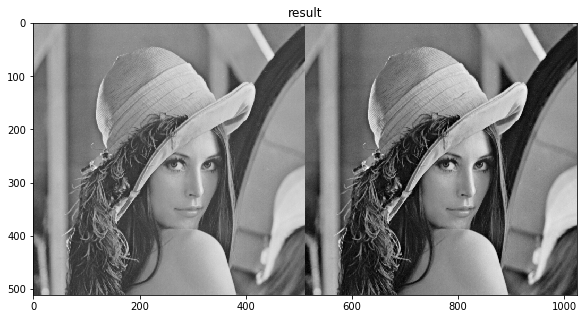

In [197]:
imshow('result', np.hstack((src, dst)))

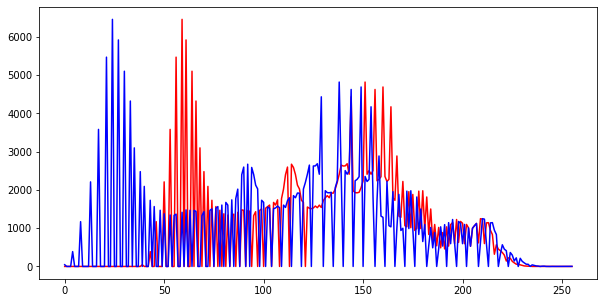

In [200]:
hist_1 = cv2.calcHist([src], [0], None, [256], [0, 256]) # 이미지, 0번 b채널 , mask=None, 256개로 분할, 범위는 0~256
hist_2 = cv2.calcHist([dst], [0], None, [256], [0, 256]) # 이미지, 0번 b채널 , mask=None, 256개로 분할, 범위는 0~256

plt.plot(hist_1, 'r')
plt.plot(hist_2, 'b')

히스토그램 스트래칭도 한 픽셀만 변경하는 것으로 POINT 방식중 하나이다.

81.0 198.0


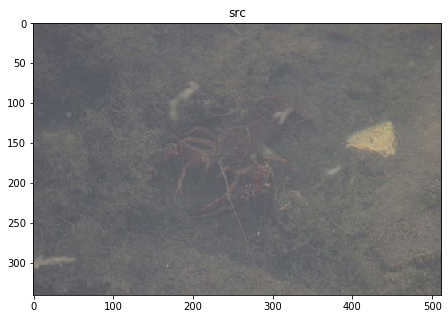

In [233]:
src = cv2.imread('img/Crayfish.JPG', 1)
gmin = float(np.min(src))
gmax = float(np.max(src))

print(gmin, gmax)
imshow("src", src)

0.0 255.0


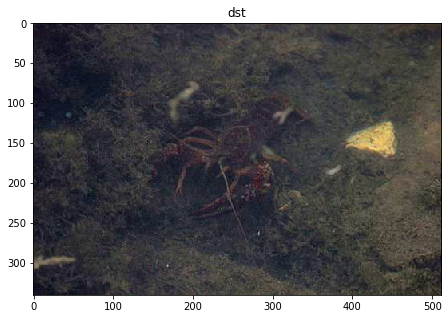

In [234]:
dst = ((src - gmin) * 255. / (gmax - gmin)).astype(np.uint8)
gmin = float(np.min(dst))
gmax = float(np.max(dst))

print(gmin, gmax)

imshow("dst", dst)

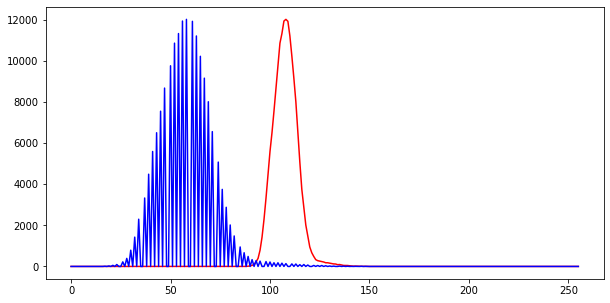

In [235]:
hist_1 = cv2.calcHist([src], [0], None, [256], [0, 256]) # 이미지, 0번 b채널 , mask=None, 256개로 분할, 범위는 0~256
hist_2 = cv2.calcHist([dst], [0], None, [256], [0, 256]) # 이미지, 0번 b채널 , mask=None, 256개로 분할, 범위는 0~256

plt.plot(hist_1, 'r')
plt.plot(hist_2, 'b')

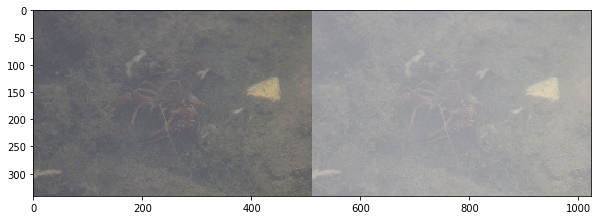

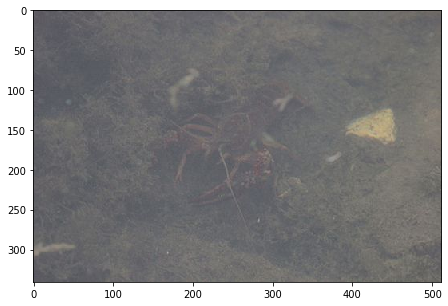

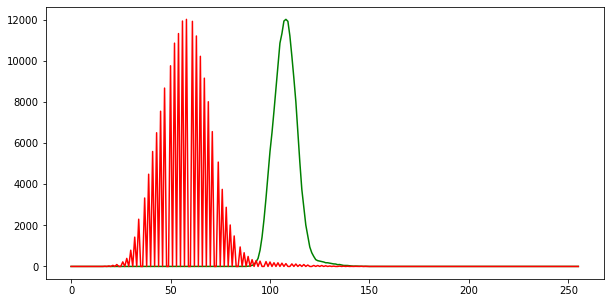

In [238]:
gamma = 0.5
table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype('uint8') 
src = cv2.imread('img/Crayfish.JPG', 1)

out = cv2.LUT(src, table)
imshow("", np.hstack((src,out)))

hist_3 = cv2.calcHist([src], [0], None, [256], [0, 256]) # 이미지, 0번 b채널 , mask=None, 256개로 분할, 범위는 0~256
hist_4 = cv2.calcHist([out], [0], None, [256], [0, 256]) # 이미지, 0번 b채널 , mask=None, 256개로 분할, 범위는 0~256

plt.plot(hist_1, 'g')
plt.plot(hist_2, 'r')
plt.show()

# 히스토그램 평활화

화소값의 분포를 나타내는 히스토그램이 균일하게 되도록 변환하는 것

원래의 명암값 40을 31로 변경 ->   
누적분포를 기준으로 내가 어느정도에 위치하는지를 계산하는 것  

n[i] = sum[i] * 1/N * 255  

컬러에서는 적용시키기 어렵고 단일컬러에만 적용가능하다.  
또한 파라미터도 없어서 영상에 대한 정보가 없을 때 가장 효율적으로 처리할 수 있는 것이  
histogram equailzatiion이다.  

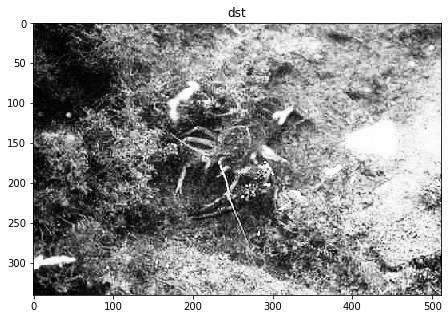

In [239]:
src = cv2.imread('img/Crayfish.JPG', 0)
dst = cv2.equalizeHist(src)

imshow("dst", dst)

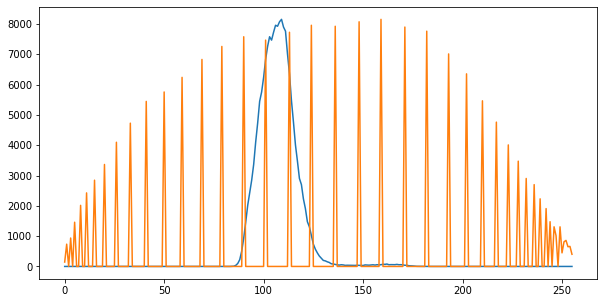

In [241]:
hist_3 = cv2.calcHist([src], [0], None, [256], [0, 256]) # 이미지, 0번 b채널 , mask=None, 256개로 분할, 범위는 0~256
hist_4 = cv2.calcHist([dst], [0], None, [256], [0, 256]) # 이미지, 0번 b채널 , mask=None, 256개로 분할, 범위는 0~256
plt.plot(hist_3)
plt.plot(hist_4)


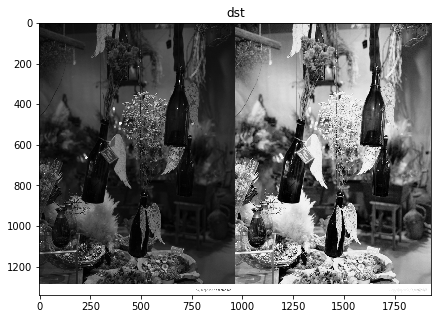

In [249]:
src = cv2.imread('img/dark2.jpg', 0)
dst = cv2.equalizeHist(src)

imshow("dst", np.hstack((src, dst)))

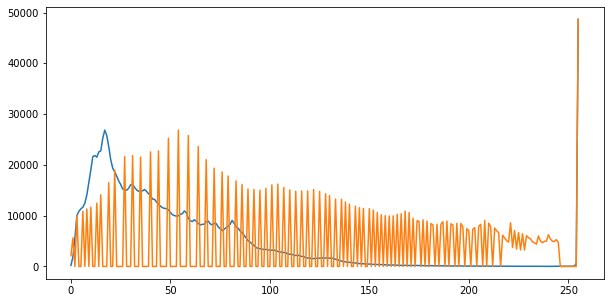

In [248]:
hist_3 = cv2.calcHist([src], [0], None, [256], [0, 256]) # 이미지, 0번 b채널 , mask=None, 256개로 분할, 범위는 0~256
hist_4 = cv2.calcHist([dst], [0], None, [256], [0, 256]) # 이미지, 0번 b채널 , mask=None, 256개로 분할, 범위는 0~256
plt.plot(hist_3)
plt.plot(hist_4)


효과가 상당히 크다.  

기계가 잘 이해할 수 있게는 equilzation

인간이 더 잘 이해할 수 있게는 gamma correction

## 히스토그램을 이용한 전경과 배경분리

기준을 잡기 어렵다.  
특정값을 사용할 수 없음  

기준  

정규분포와 k-means  



### adaptive threshold 

이미지 임계처리  

K means를 사용하여 전경과 배경의 분산의 중심점을 찾아 그 둘의 중간으로 이미지 임계처리를 한다.  

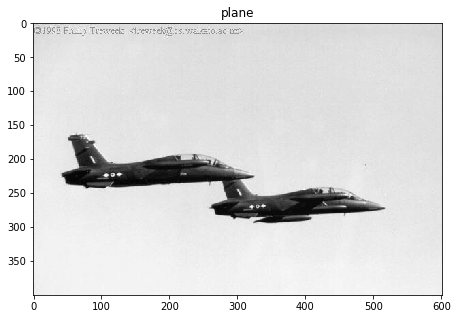

(240400, 1)


In [263]:
img = cv2.imread('img/plane.jpg', 0)
# img =cv2.imread('img/gray.png', 0)
# img = (img > 127) * 255
imshow('plane', img)

X = img.flatten().reshape(-1, 1)
print(X.shape)

In [271]:
img.flatten().reshape(-1, 1)

array([[255],
       [255],
       [255],
       ...,
       [255],
       [255],
       [255]])

픽셀갯수 -> sample 갯수  


In [266]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
p = kmeans.cluster_centers_

In [267]:
th = (p[1,0] + p[0,0]) / 2.0
print(th)

138.64838481156278


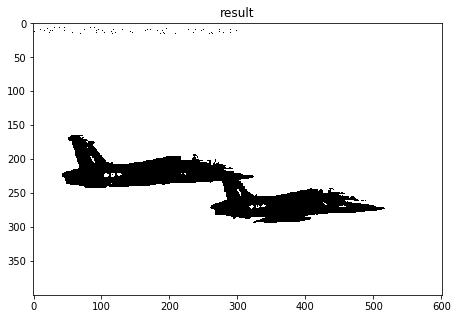

In [268]:
img = (img > th) * 255
imshow('result', img)

다른 예제 사진으로 바이너리화해보기

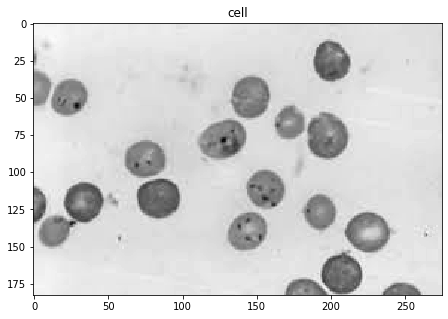

(50325, 1)
[[225.87774914]
 [145.02825692]]


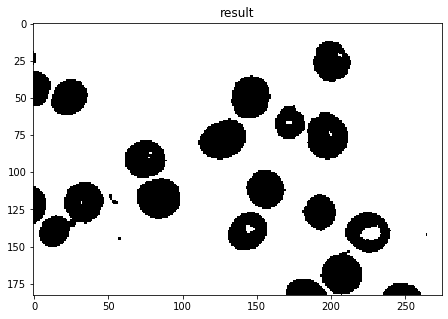

In [273]:
img = cv2.imread('img/cells.jpg', 0)
imshow('cell', img)

X = img.flatten().reshape(-1, 1)
print(X.shape)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
p = kmeans.cluster_centers_
print(p)

th = (p[1,0] + p[0,0]) / 2.0
img = (img > th) * 255
imshow('result', img)